# JAM FITTER

In [54]:
import sys,os
from fitlab.resman import RESMAN
from fitlab.mcsamp import MCSAMP
from tools.config import load_config,conf
from tools.tools import load, save,checkdir
import pylab as py
import numpy as np
import pandas as pd
import copy
def lprint(msg):
    sys.stdout.write('\r')
    sys.stdout.write('%s' %msg)
    sys.stdout.flush()
%matplotlib inline

## setup path to store the results 

In [55]:
path2results='sidis_hermes_val_alexei'
checkdir(path2results)

## data sets 

In [56]:
conf['datasets']={}

## SIDIS FUU 

In [57]:
conf['datasets']['sidis']={}
conf['datasets']['sidis']['filters']={}
conf['datasets']['sidis']['filters'][0]={}
conf['datasets']['sidis']['filters'][0]['idx']=[1000,1001,1004,1005,1002,1003,1006,1007]
conf['datasets']['sidis']['filters'][0]['filter']="z>0.2 and z<0.6 and Q2>1.69 and (pT/z)**2<0.25*Q2 and dy>2.5"
#conf['datasets']['sidis']['filters'][0]['filter']="z>0.2 and z<0.6 and Q2>1."



conf['datasets']['sidis']['xlsx']={}
conf['datasets']['sidis']['xlsx'][1000]='sidis/expdata/1000.xlsx'  # |  proton   | pi+    | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1001]='sidis/expdata/1001.xlsx'  # |  proton   | pi-    | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1004]='sidis/expdata/1004.xlsx'  # |  deuteron | pi+    | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1005]='sidis/expdata/1005.xlsx'  # |  deuteron | pi-    | M_Hermes | hermes 

conf['datasets']['sidis']['xlsx'][1002]='sidis/expdata/1002.xlsx'  # |  proton   | k+    | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1003]='sidis/expdata/1003.xlsx'  # |  proton   | k-    | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1006]='sidis/expdata/1006.xlsx'  # |  deuteron | k+    | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1007]='sidis/expdata/1007.xlsx'  # |  deuteron | k-    | M_Hermes | hermes 

conf['datasets']['sidis']['norm']={}
for k in conf['datasets']['sidis']['xlsx']: conf['datasets']['sidis']['norm'][k]={'value':1,'fixed':True,'min':0,'max':1} 


## parameters

In [58]:
conf['params']={}
conf['basis']='valence'

### PDF parameters

In [63]:
conf['params']['pdf']={}
conf['params']['pdf']['widths0 uv']  = {'value':3.64996e-01,'fixed':False,'min':0.1,'max':1.5}
conf['params']['pdf']['widths0 dv']  = {'value':3.60774e-01,'fixed':False,'min':0.1,'max':1.5}
conf['params']['pdf']['widths0 sea']      = {'value':3.77573e-01,'fixed':False,'min':0.1,'max':1.8}


In [64]:
conf['params']['ff']={}
conf['params']['ff']['widths0 pi+ fav']   = {'value':1.87189e-01,'fixed':False,'min':0.1,'max':0.3}
conf['params']['ff']['widths0 pi+ unfav'] = {'value':1.85434e-01,'fixed':False,'min':0.1,'max':0.3}
conf['params']['ff']['widths0 k+ fav']    = {'value':2.29877e-01,'fixed':False,'min':0.1,'max':0.3}
conf['params']['ff']['widths0 k+ unfav']  = {'value':1.16534e-01,'fixed':False,'min':0.1,'max':0.3}

## Nested Sampling

### initialize fitpack libraries

In [65]:
conf['resman'] = RESMAN()
mcsamp=MCSAMP()

loading sidis data sets 1007
multiprocess setup: ncpus=1 / observable


## Single Fit

In [62]:
from fitlab.maxlike import ML
from qcdlib.aux import AUX
from fitlab.parman import PARMAN
conf['parman'] = PARMAN()
conf['aux']=AUX()
ML().run_minimize()

JAM FITTER
count = 1
elapsed time(mins)=0.000418
shifts  = 0
npts    = 417
chi2    = 627.372530
rchi2   = 0.000000
nchi2   = 0.000000
chi2tot = 627.372530
dchi2(iter)  = 0.000000
dchi2(local) = -inf

reaction: sidis
    idx        tar        had        col        obs  npts       chi2      rchi2      nchi2
   1000     proton        pi+     hermes   M_Hermes    60     144.66       0.00       0.00
   1001     proton        pi-     hermes   M_Hermes    60     105.93       0.00       0.00
   1002     proton         k+     hermes   M_Hermes    44      60.43       0.00       0.00
   1003     proton         k-     hermes   M_Hermes    44      18.29       0.00       0.00
   1004   deuteron        pi+     hermes   M_Hermes    60     100.62       0.00       0.00
   1005   deuteron        pi-     hermes   M_Hermes    60     107.37       0.00       0.00
   1006   deuteron         k+     hermes   M_Hermes    45      19.86       0.00       0.00
   1007   deuteron         k-     hermes   M_Hermes    4

KeyError: 'args'

### start multiple NS runs
- the code will start n independent runs specified by size

In [ ]:
conf['size']=10
conf['factor']=4 # play with the factor (3,4) and the tolerance (1.e-5,1.e-10)
conf['tol']=1e-10
mcsamp.run(path2results)

iter=167  logz=-140.492 rel-err=7.656e-03  t-elapsed=3.958e+01  dchi2min=2.170e+02 dchi2max=2.511e+02

### combine multiple runs into one big run

In [50]:
MC=mcsamp.get_MC_samples(path2results+'/mcdata')

runs max likelihoods
101.815661007
101.041342786
104.533920681
100.958108854
100.958108851
101.201085094
100.95810893
100.958108881
100.958108768
100.958108915
sample  size= 14052
sample2 size= 1476


### distribution of parameters

          widths0 uv =    0.75338 +/-    0.35680
         widths0 sea =    0.37604 +/-    0.02215
          widths0 dv =    0.38423 +/-    0.05881
         widths0 sea =    0.37604 +/-    0.02215
     widths0 pi+ fav =    0.18924 +/-    0.00379
   widths0 pi+ unfav =    0.18576 +/-    0.00449


ValueError: num must be 1 <= num <= 6, not 7

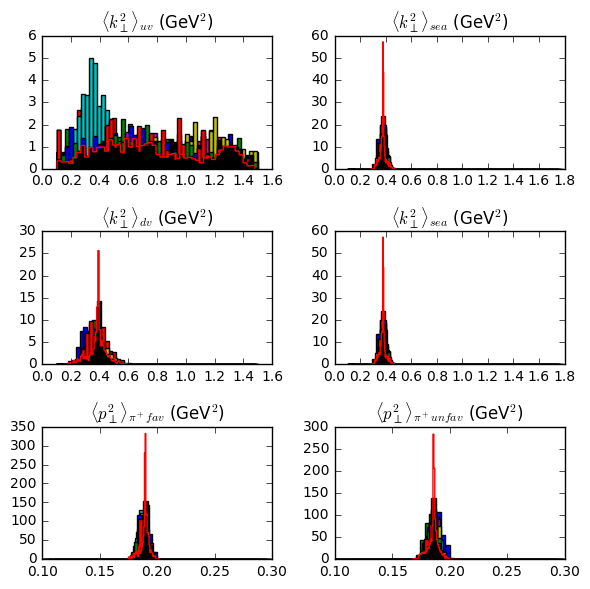

In [53]:
samples=MC['samples']
samples2=MC['samples2']
weights=MC['weights']
weights2=MC['weights2']
order=MC['order']
runs=MC['runs']

nrows,ncols=3,2
fig = py.figure(figsize=(ncols*3,nrows*2))

def get_idx(key,tag):
    for i in range(len(order)):
        if order[i][1]==key and order[i][2]==tag:
            return i

def title(tags,i):
    if tags[i] == 'widths0 uv':
        return r"$\langle k_\perp^2 \rangle_{uv}$ (GeV$^2$)"
    if tags[i] == 'widths0 dv':
        return r"$\langle k_\perp^2 \rangle_{dv}$ (GeV$^2$)"
    if tags[i] == 'widths0 sea':
        return r"$\langle k_\perp^2 \rangle_{sea}$ (GeV$^2$)"
    if tags[i] == 'widths0 pi+ fav':
        return r"$\langle p_\perp^2 \rangle_{\pi^+ fav}$ (GeV$^2$)"
    if tags[i] == 'widths0 pi+ unfav':
        return r"$\langle p_\perp^2 \rangle_{\pi^+ unfav}$ (GeV$^2$)"
    if tags[i] == 'widths0 k+ fav':
        return r"$\langle p_\perp^2 \rangle_{K^+ fav}$ (GeV$^2$)"
    if tags[i] == 'widths0 k+ unfav':
        return r"$\langle p_\perp^2 \rangle_{K^+ unfav}$ (GeV$^2$)"




        
        
        
global cnt
cnt=0
def plot(tags,name = None):
    global cnt
    for i in range(1,len(tags)):
        cnt+=1
        if tags[i]==None: continue
        idx=get_idx(tags[0],tags[i])
        ax=py.subplot(nrows,ncols,cnt)
        vmin=np.amin(samples2.T[idx])
        vmax=np.amax(samples2.T[idx])
        R=None#(vmin,vmax)
        for k in runs:
            ax.hist(runs[k]['samples'].T[idx],weights=runs[k]['weights'],bins=50,normed=True,range=R)
        ax.hist(samples.T[idx],weights=weights,bins=50,color='k',normed=True,range=R)
        ax.hist(samples2.T[idx],weights=weights2,bins=50,color='r',histtype='step',normed=True,range=R)
        #ax.set_title(tags[i])
        ax.set_title(title(tags,i))
        mean=np.einsum('i,i',samples2.T[idx],weights2)
        std=np.einsum('i,i',(samples2.T[idx]-mean)**2,weights2)**0.5
        print '%20s = %10.5f +/- %10.5f'%(tags[i],mean,std)
        #ax.set_xlim(vmin,vmax)
    py.tight_layout()
    if name: py.savefig(name)

plot(['pdf','widths0 uv','widths0 sea'],"kperp_hermes.pdf")
plot(['pdf','widths0 dv','widths0 sea'],"kperp_hermes.pdf")
plot(['ff','widths0 pi+ fav','widths0 pi+ unfav'],"pperp_pi_hermes.pdf")
plot(['ff','widths0 k+ fav','widths0 k+ unfav'],"pperp_k_hermes.pdf")


## data vs theory

In [18]:
data={'weights':MC['weights2']}
cnt=0
for s in MC['samples2']:
    cnt+=1    
    lprint('%d/%d'%(cnt,len(MC['samples2'])))  
    conf['resman'].get_residuals(s);
    for k in conf['resman'].sidisres.tabs:
        if k  not in data: data[k]=[]
        thy=conf['resman'].sidisres.tabs[k]['thy']    
        norm=conf['datasets']['sidis']['norm'][k]['value']
        shift=conf['resman'].sidisres.tabs[k]['shift']        
        data[k].append(shift+thy/norm)
save(data,'%s/%s'%(path2results,'sidis.dat'))   

2171/2171

### compute averages and collect results

In [19]:
data=load('%s/%s'%(path2results,'sidis.dat'))   
for k in data: data[k]=np.array(data[k])
thy,dthy={},{}
for k in data:
    if k=='weights': continue
    thy[k]=np.einsum('i,ik->k',data['weights'],data[k])
    dthy[k]=np.einsum('i,ik->k',data['weights'],(data[k]-thy[k])**2)**0.5
for k in thy: 
    conf['resman'].sidisres.tabs[k]['thy']=copy.copy(thy[k])
    conf['resman'].sidisres.tabs[k]['dthy']=copy.copy(dthy[k])

In [20]:
report=conf['resman'].gen_report(verb=0,level=1)
delimiters=[]
for i in range(len(report)): 
    if 'reaction:' in report[i]: delimiters.append(i) 

data={}
nlines=len(report)
for i in range(len(delimiters)):
    ini=delimiters[i]
    if i==len(delimiters)-1: fin=len(report)
    else: fin=delimiters[i+1]
    reaction=report[ini].replace('reaction:','').strip()
    data[reaction]={'raw data':report[ini:fin]}
    
for k in data:
    print k
    block=data[k]['raw data']
    isep=[i for i in range(len(block)) if '--------' in block[i]][0]
    data[k]['summary']=[block[i] for i in range(isep)]
    data[k]['tables']=[block[i] for i in range(isep+1,len(block))]

    tabs={}
    for l in data[k]['tables']:
        info=l.split(',')
        col=[s for s in info if 'col' in s][0].split('=')[1].strip()
        if col not in tabs: tabs[col]={}
        info=[[ss.strip() for ss in s.split('=')] for s in info if 'col' not in info  if s.strip()!='']
        
        for s in info:
            if s[0] not in tabs[col]: tabs[col][s[0]]=[]
        
        for s in info:
            try:
                value=float(s[1])
            except:
                value=s[1]
            tabs[col][s[0]].append(value)        

    data[k]['tabs']=tabs
save(data,'%s/%s'%(path2results,'data_and_thy.dat'))  

sidis


In [21]:
def summary():
    for k in data:
        print ""
        for l in data[k]['summary']: print l
summary()


reaction: sidis
    idx        tar        had        col        obs  npts       chi2      rchi2      nchi2
   1000     proton        pi+     hermes   M_Hermes    60     150.47       0.00       0.00
   1001     proton        pi-     hermes   M_Hermes    60     114.62       0.00       0.00
   1002     proton         k+     hermes   M_Hermes    44      51.04       0.00       0.00
   1003     proton         k-     hermes   M_Hermes    44      19.71       0.00       0.00
   1004   deuteron        pi+     hermes   M_Hermes    60     100.76       0.00       0.00
   1005   deuteron        pi-     hermes   M_Hermes    60     105.32       0.00       0.00
   1006   deuteron         k+     hermes   M_Hermes    45      20.07       0.00       0.00
   1007   deuteron         k-     hermes   M_Hermes    44      75.37       0.00       0.00


### plot data and theory

In [22]:
data=load('%s/%s'%(path2results,'data_and_thy.dat'))

### 1000

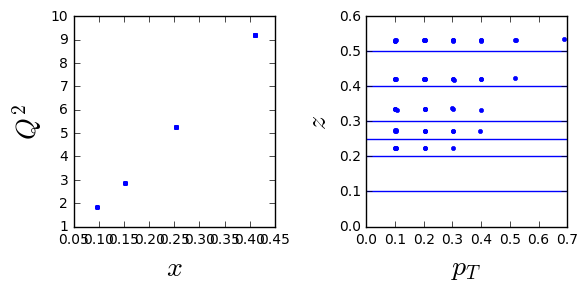

In [23]:
tab=pd.DataFrame(data['sidis']['tabs']['hermes']).query('idx==1000')
tab['xr']=[np.round(x,2) for x in tab.x]
ZR=[[0.1,0.2],[0.2,0.25],[0.25,0.3],[0.3,0.4],[0.4,0.5],[0.5,1]]

nrows,ncols=1,2
fig = py.figure(figsize=(ncols*3,nrows*3))
ax=py.subplot(nrows,ncols,1)
ax.plot(tab['x'],tab['Q2'],'.'); ax.set_xlabel(r'$x$',size=20); ax.set_ylabel(r'$Q^2$',size=20)
ax=py.subplot(nrows,ncols,2)
ax.plot(tab['pT'],tab['z'],'.'); ax.set_xlabel(r'$p_T$',size=20); ax.set_ylabel(r'$z$',size=20);
for zr in ZR: ax.axhline(y=zr[0]);
py.tight_layout()

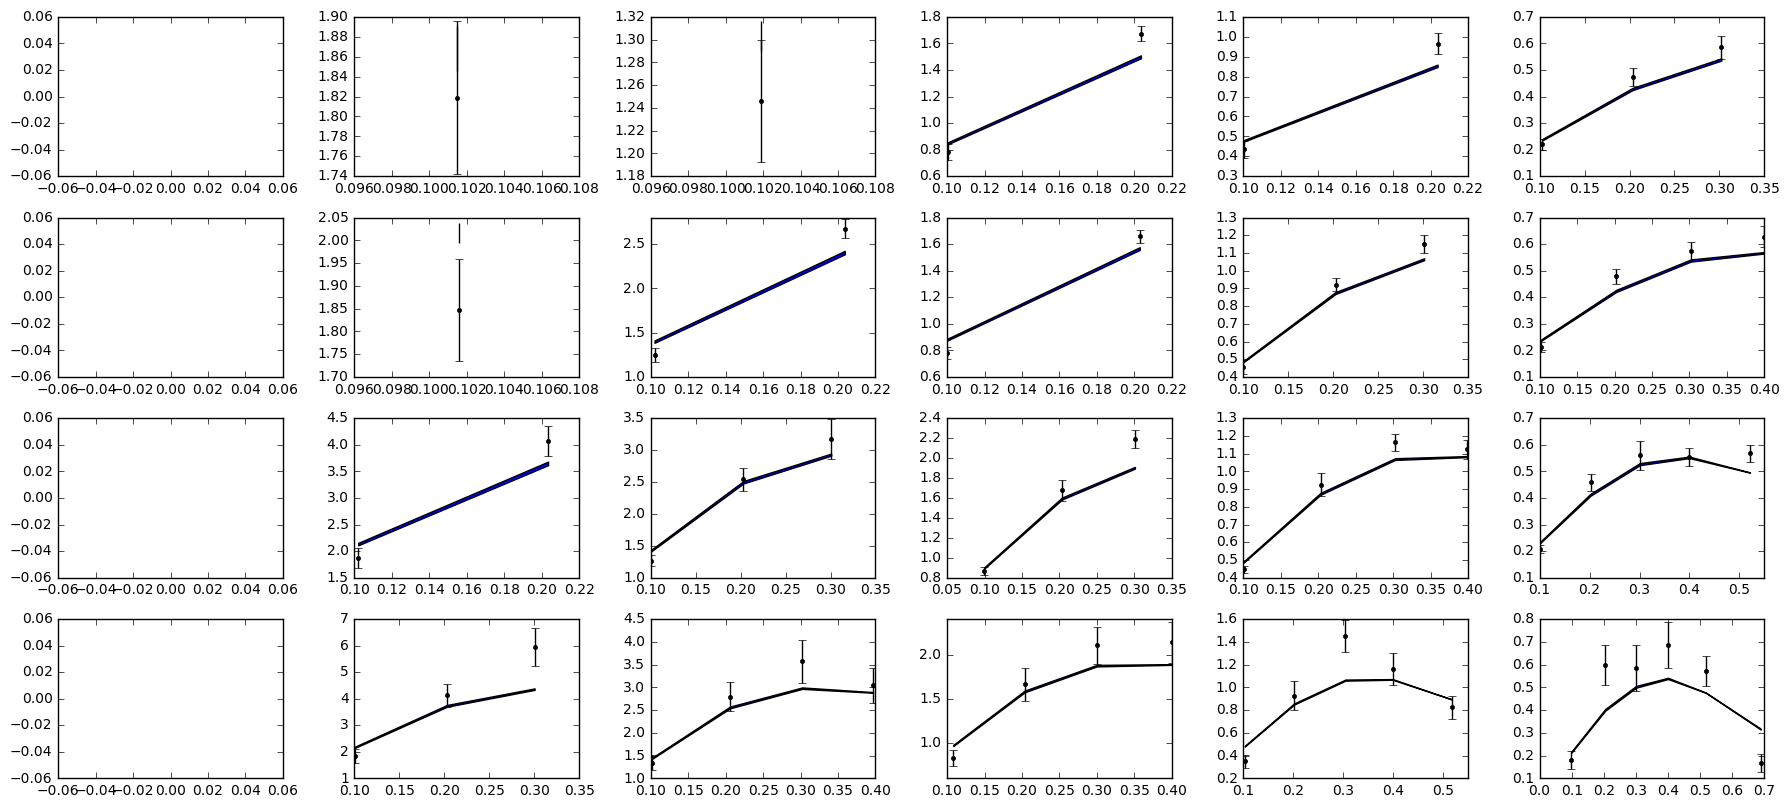

In [24]:
nrows,ncols=6,6
fig = py.figure(figsize=(ncols*3,nrows*2))
cnt=0
for xr in np.unique(tab['xr']):
    tabx=tab.query('xr==%f'%xr)
    for zr in ZR:
        tabz=tabx.query('z>%f and z<%f'%(zr[0],zr[1]))
        cnt+=1
        ax=py.subplot(nrows,ncols,cnt)
        ax.errorbar(tabz['pT'],tabz['exp'],yerr=tabz['alpha'],fmt='k.')
        ax.fill_between(tabz['pT'],tabz['thy']-tabz['dthy'],tabz['thy']+tabz['dthy'])
        
py.tight_layout()

In [31]:
pwd

u'/Users/avp5627/GIT/TMD-PHENO-REPOS/fitpack/fitlab/notebooks'

In [32]:
from plotter import Plotter
from matplotlib import rc
import matplotlib.pyplot as plt

rc("font", **{"family": "sans-serif", "sans-serif": ["Helvetica"]})

#conf = load_config("../fitlab/inputs/upol_hermes_noevolution.py")

#conf["resman"] = RESMAN(conf)
#conf["resman"].get_residuals(conf["parman"].par)



x_bins = [0.023, 0.047, 0.075, 0.12, 0.2, 0.35, 0.6]
q2_bins = [1.0, 15.0]



#raw = pd.read_excel('../database/sidis/expdata/1002.xlsx')
raw = pd.read_excel('../../database/sidis/expdata/1002.xlsx')


data = pd.concat(pd.DataFrame(d)
                 for d in conf["resman"].sidisres.tabs.values())

data = data[(data["hadron"] == "k+") &
            (data["target"] == "proton")]

z_bin_edges = [0.1 , 0.2 , 0.25 , 0.3 , 0.375 , 0.475 , 0.6 , 0.8 , 1.1]
z_bins = list(zip(z_bin_edges[:], z_bin_edges[1:]))

def z_func(z):
    for k, (zmin, zmax) in enumerate(z_bins):
        if (z <= zmax) and ((zmin < z) or (k == 0 and zmin <= z)):
            return k

z_ids = tuple(range(8))

z_labs = {
    0: r"$z \in \left[ 0.1, 0.2 \right]$",
    1: r"$z \in \left( 0.2, 0.25 \right]$",
    2: r"$z \in \left( 0.25, 0.3 \right]$",
    3: r"$z \in \left( 0.3, 0.375 \right]$",
    4: r"$z \in \left( 0.375, 0.475 \right]$",
    5: r"$z \in \left( 0.475, 0.6 \right]$",
    6: r"$z \in \left( 0.6, 0.8 \right]$",
    7: r"$z \in \left( 0.8, 1.1 \right]$"
}

raw["qT"] = raw["pT"] / raw["z"]
data["qT"] = data["pT"] / data["z"]

col_lab = "pT"
sub_xlabel = r"$p_T$ (GeV)"

big_xlabel = "$x$"
big_ylabel = "$Q^2$"

title = "HERMES"

sub_ylabel = r"$M_{D}^{\pi^+}$"

fig_kw = {"figsize": (13, 13)}

plotter = Plotter(raw=raw,
                  data=data,
                  col_lab=col_lab,
                  q2_bins=q2_bins,
                  x_bins=x_bins,
                  z_func=z_func,
                  z_ids=z_ids,
                  z_labs=z_labs,
                  sub_xlabel=sub_xlabel,
                  sub_ylabel=sub_ylabel,
                  big_xlabel=big_xlabel,
                  big_ylabel=big_ylabel,
                  title=title,
                  fig_kw=fig_kw
                  )

plotter.raw_plot_kw["alpha"] = 0.4
 
plotter.raw_plot_kw["markersize"] = 2
plotter.raw_plot_kw["linewidth"] = 2

plotter.data_plot_kw["alpha"] = 1.0
plotter.data_plot_kw["markersize"] = 2.4
plotter.data_plot_kw["linewidth"] = 2
plotter.data_plot_kw["markeredgecolor"] = (0.8392156862745098,
                                           0.15294117647058825,
                                           0.1568627450980392)  # To increase visibility
plotter.data_plot_kw["markeredgewidth"] = 0.16

plotter.legend_kw["bbox_to_anchor"] = (0.9 / plotter.ncols, 1 - 0.5 / plotter.nrows)
plotter.legend_kw["loc"] = "center"

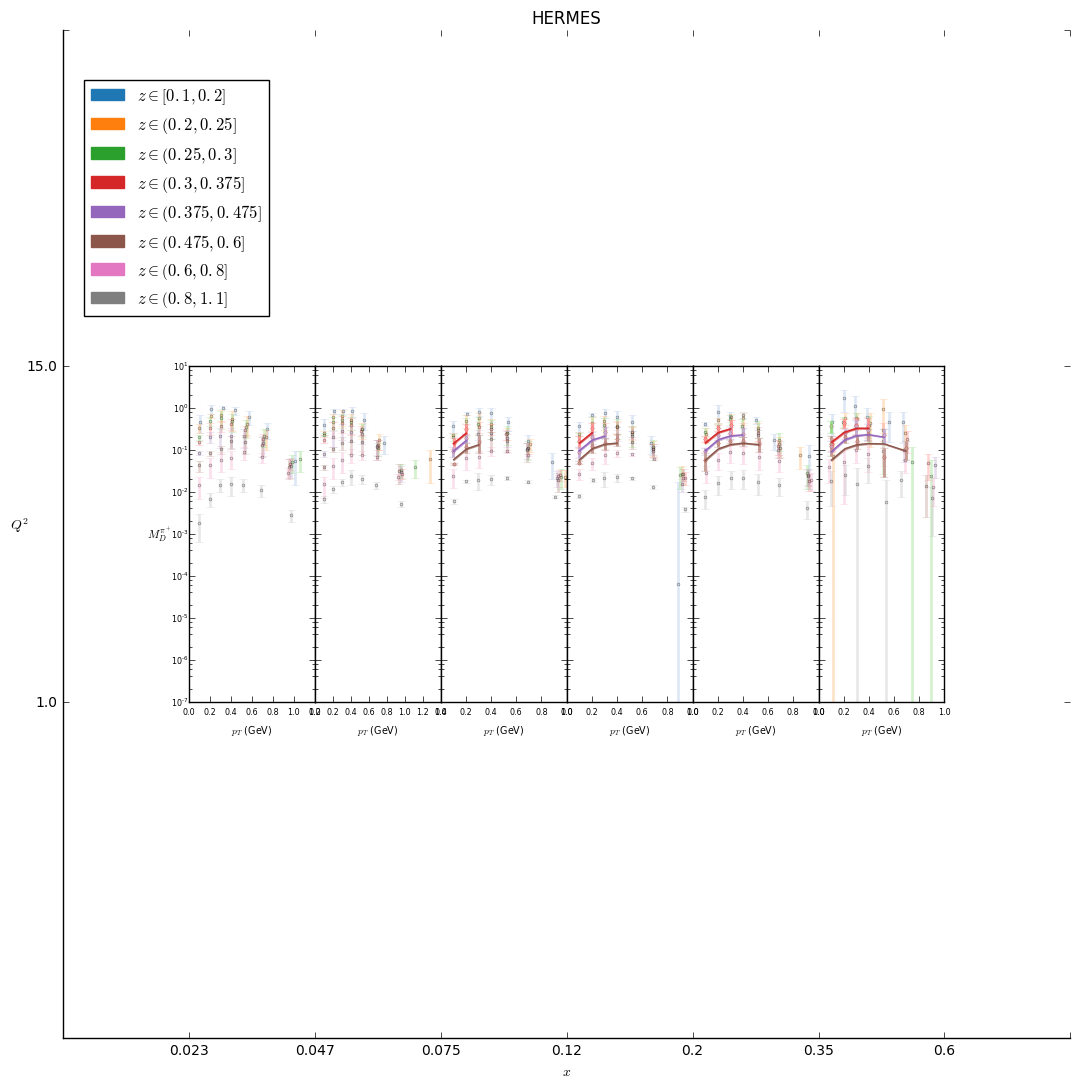

In [33]:
plotter.plot()

In [34]:
from matplotlib import rc
rc("font", **{"family": "sans-serif", "sans-serif": ["Helvetica"]})


data = pd.concat(pd.DataFrame(d)
                 for d in conf["resman"].sidisres.tabs.values())

data = data[(data["hadron"] == "pi+") &
            (data["target"] == "proton")]

In [36]:
#####################
# reading the data ##
#####################
#dat=pd.read_excel('E:/Laptop/School/Interships/Dr_Prokudin/Juniper82/PHYS296/dat/expdat/1000.xlsx');
#dat=pd.read_excel('C:/Users/Dolam/Documents/Scott/1000.xlsx');
dat=pd.read_excel('../../database/sidis/expdata/1000.xlsx');

In [37]:
######################
# Calculated values ##
######################
dat["delta"] = np.sqrt(dat["stat_u"]**2.0) # measurment error

data["delta"] = np.sqrt(data["stat_u"]**2.0) # measurment error

In [38]:
##################
## Binning data ##
##################
# data bin edeges

xBin=np.array([0.023,0.047,0.075,0.12,0.35,0.6]) # Bins for x used to plot Pt
Q2Bin=np.array([1.0,10]) # **NOTE** includes all Q2 data, therefore all value data is plotted vs. Pt
zBin= np.array([0.1, 0.2,0.25,0.3, 0.375, 0.475, 0.6, 0.8, 1.1]) # catagories for z to be ploted indiviualy in each subplot

# binning data
dat['xBin'] = pd.cut(dat['x'], xBin,labels = False, retbins=0)
dat['Q2Bin'] = pd.cut(dat['Q2'], Q2Bin,labels = False, retbins=0)
dat['zBin'] = pd.cut(dat['z'], zBin,labels = False, retbins=0)

data['xBin'] = pd.cut(data['x'], xBin,labels = False, retbins=0)
data['Q2Bin'] = pd.cut(data['Q2'], Q2Bin,labels = False, retbins=0)
data['zBin'] = pd.cut(data['z'], zBin,labels = False, retbins=0)

# bins for x and y that have non-empty intersection
pTdatmod=[0,1,2,3,4] # xBins that overlap Q2Bins
valuedatmod=[0] # Q2bins that overlap xBins

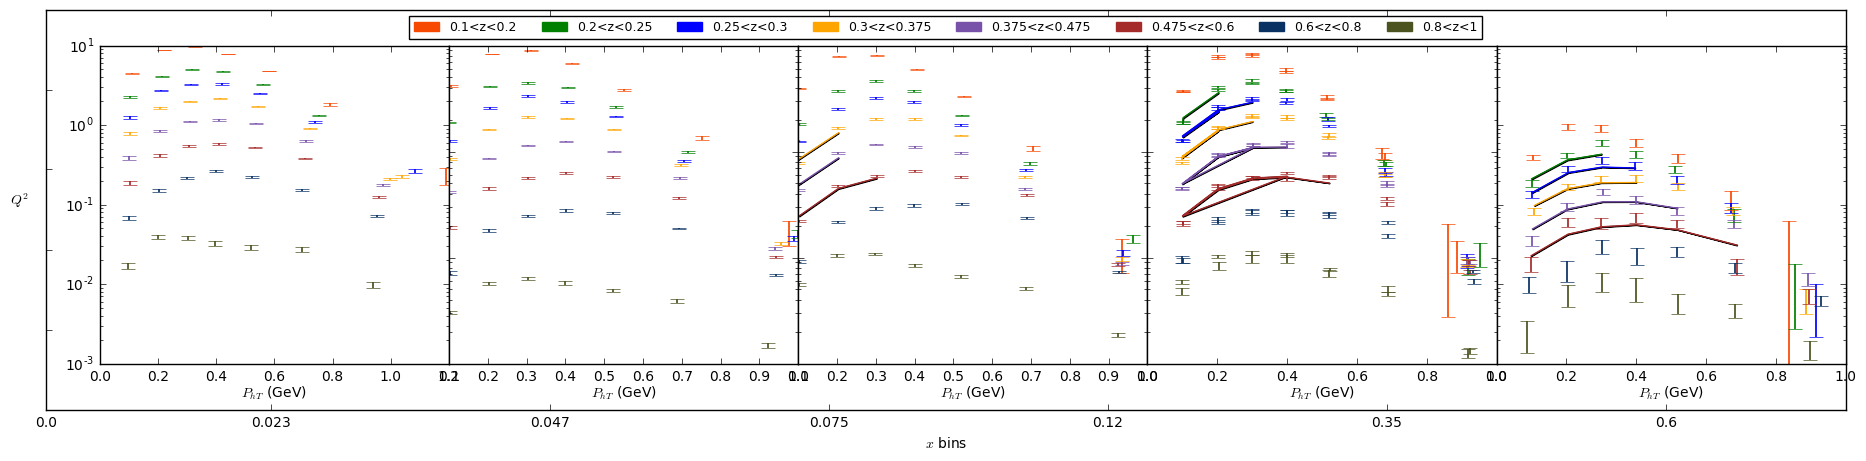

In [20]:
###############
# HermesPlot ##
###############  Reduced matix 
# initialize the figure
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages

fig1=plt.figure(figsize=(18, 4),facecolor="white") # figsize; wxh in inche
globalGrid=gridspec.GridSpec(1, 1,left=0.03,right=1,top=.91,bottom=.115, wspace=0.0, hspace=0.0) # plot for subplot matrix as 1x1 matrix
innerGrid=gridspec.GridSpecFromSubplotSpec(1,5 , subplot_spec=globalGrid[0], wspace=0.0, hspace=0.0) # 5x6 subplot grid 

# figure properties:
ax=fig1.add_axes([0,0,1,1]) # axas for subplot matrix as percent of hole
#ax.yaxis.set_ticks([0,1.25,2.76,4.27,5.78,7.29,8.8,10])
ax.xaxis.set_ticks([0,1.25,2.8,4.35,5.9,7.45,9,10 ])
xticklabels = np.array([0,0.023,0.047,0.075,0.12,0.35,0.6]) 

ax.set_yticklabels("")
ax.set_xticklabels(xticklabels)
ax.set_xlabel(r"$x$ bins") # xy-lables
ax.set_ylabel(r"$Q^2$",rotation="horizontal",labelpad = 15)
#ax.grid() # grid currently off

# subplot axis proerties (unused)
Zcolor=['#F74902',"green","blue",'orange',"#7851a9","brown",'#093162','#4b5320']
Zmark=["o","o","o","o"]

# Set legend
Zpatch1 = mpatches.Patch(color=Zcolor[0], label='0.1<z<0.2')
Zpatch2 = mpatches.Patch(color=Zcolor[1], label='0.2<z<0.25')
Zpatch3 = mpatches.Patch(color=Zcolor[2], label='0.25<z<0.3')
Zpatch4 = mpatches.Patch(color=Zcolor[3], label='0.3<z<0.375')
Zpatch5 = mpatches.Patch(color=Zcolor[4], label='0.375<z<0.475')
Zpatch6 = mpatches.Patch(color=Zcolor[5], label='0.475<z<0.6')
Zpatch7 = mpatches.Patch(color=Zcolor[6], label='0.6<z<0.8')
Zpatch8 = mpatches.Patch(color=Zcolor[7], label='0.8<z<1')
          
ax.legend(handles=[Zpatch1,Zpatch2,Zpatch3,Zpatch4,Zpatch5,Zpatch6,Zpatch7,Zpatch8],
          loc='upper center',
          ncol=8,prop={'size': 9}
          )
          
for f,F in zip(range(len(pTdatmod)),pTdatmod):       
    for j,J in zip(range(len(valuedatmod)),valuedatmod):
        
        k = int(f) # kth possition for subplot on innerGrid matrix
        maskX = dat['xBin'].isin([F]) # returns boolean for all Jth xBin in dat  
        maskY = dat['Q2Bin'].isin([J]) # returns boolean for all Fth Q2Bin in dat
        
        maskX_thr = data['xBin'].isin([F]) # returns boolean for all Jth xBin in dat  
        maskY_thr = data['Q2Bin'].isin([J]) # returns boolean for all Fth Q2Bin in dat
       
        ax = fig1.add_subplot(innerGrid[k]) # add subplot in innerGrid
        xydat = dat[maskX & maskY] # subset of data for Jth xBin and Fth Q2Bin
        
        xydata = data[maskX_thr & maskY_thr] # subset of data for Jth xBin and Fth Q2Bin
        
        for z in range(len(zBin)-1): 
            maskZ = xydat["zBin"].isin([z])
            databin = xydat[maskZ]
            
            maskZ_thr = xydata["zBin"].isin([z])
            databin_thr = xydata[maskZ_thr]
            
            if f != 0:
                ax.errorbar(databin['pT'],databin['value'],yerr=databin['delta'],capsize=5,linestyle="",color = Zcolor[z],elinewidth=1.25)
                ax.set_xlabel(r"$p_T$ (GeV)",labelpad=1)
                ax.set_yscale('log')
                ax.set_yticklabels('')
                
                ax.plot(databin_thr['pT'],databin_thr['thy'],linestyle="-",color = Zcolor[z]) # theory
                ax.fill_between(databin_thr['pT'],databin_thr['thy']-databin_thr['dthy'],databin_thr['thy']+databin_thr['dthy']) # theory error
                ax.set_xlabel(r"$P_{hT}$ (GeV)",labelpad=1)
                ax.set_yticklabels('')
               
            else:
                ax.errorbar(databin['pT'],databin['value'],yerr=databin['delta'],capsize=5,linestyle="", color = Zcolor[z],elinewidth=1.25)
                
                ax.plot(databin_thr['pT'],databin_thr['thy'],linestyle="-",color = Zcolor[z]) #theory
                ax.fill_between(databin_thr['pT'],databin_thr['thy']-databin_thr['dthy'],databin_thr['thy']+databin_thr['dthy']) # theory error

                
                ax.set_xlabel(r"$P_{hT}$ (GeV)",labelpad=1)
                ax.set_yscale('log')
plt.savefig("hermes_fit.pdf")                